In [1]:
from network_utils import *
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

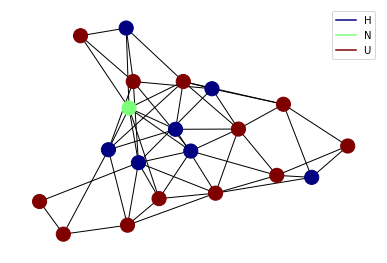

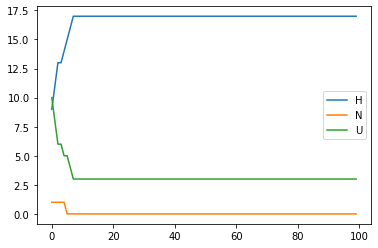

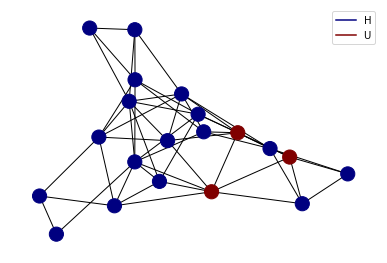

In [2]:
size = 20
steps = 100
mem_dist = generate_membership_dist(size)
mem_map = generate_size_dist(mem_dist)
G = fill_graph(size, mem_map)
viz_graph(G)
if_factor = 0.02

# Probabilities of changing from one state to another
probability_map = {
    "HU": (0.5, "H"), # Peer pressure (prob scaled by the size of the group)
    "HN": (0.25, "U"),
    "NU": (0.5, "N"), # Information fatigue (over time influence goes down)
    "NH": (0.25, "U")
}

H, N, U = [], [], []

for i in range(steps):
    pop_counts = update_clustered_network(G, probability_map, mem_map)
    H.append(pop_counts["H"])
    N.append(pop_counts["N"])
    U.append(pop_counts["U"])
    probability_map["NU"] -= probability_map["NU"]*if_factor

plt.plot(H, label="H")
plt.plot(N, label="N")
plt.plot(U, label="U")
plt.legend()
plt.show()
viz_graph(G)